In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w

pd.set_option('display.max_columns', None)


In [144]:
# Set default seaborn style
plt.rc('figure', figsize=(10, 7))
plt.style.use('fivethirtyeight')


In [145]:
df = w.get_superstore_data()

Let me get that for you...


In [146]:
df.head()

,Unnamed: 0,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [147]:
df.shape

(1734, 23)

In [148]:
df.isnull().sum()

Unnamed: 0       0
Region ID        0
Product ID       0
Customer ID      0
Category ID      0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Sales            0
Quantity         0
Discount         0
Profit           0
Category         0
Sub-Category     0
Customer Name    0
Product Name     0
Region Name      0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1734 non-null   int64  
 1   Region ID      1734 non-null   int64  
 2   Product ID     1734 non-null   object 
 3   Customer ID    1734 non-null   object 
 4   Category ID    1734 non-null   int64  
 5   Order ID       1734 non-null   object 
 6   Order Date     1734 non-null   object 
 7   Ship Date      1734 non-null   object 
 8   Ship Mode      1734 non-null   object 
 9   Segment        1734 non-null   object 
 10  Country        1734 non-null   object 
 11  City           1734 non-null   object 
 12  State          1734 non-null   object 
 13  Postal Code    1734 non-null   float64
 14  Sales          1734 non-null   float64
 15  Quantity       1734 non-null   float64
 16  Discount       1734 non-null   float64
 17  Profit         1734 non-null   float64
 18  Category

In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1734.0,866.500000,500.707000,0.0000,433.2500,866.50000,1299.75000,1733.000
Region ID,1734.0,2.722607,1.062277,1.0000,2.0000,3.00000,4.00000,4.000
Category ID,1734.0,8.106113,3.480593,1.0000,6.0000,8.00000,11.00000,17.000
Postal Code,1734.0,53501.926182,32180.245224,1841.0000,19143.0000,50315.00000,85705.00000,98661.000
Sales,1734.0,229.206358,532.862614,1.0800,16.6950,52.24500,209.91750,8159.952
Quantity,1734.0,3.794694,2.297407,1.0000,2.0000,3.00000,5.00000,14.000
Discount,1734.0,0.160110,0.206419,0.0000,0.0000,0.20000,0.20000,0.800
Profit,1734.0,21.880351,202.891949,-3839.9904,1.7024,8.07305,27.41445,3177.475


In [151]:
df['Customer ID'].nunique()

525

In [152]:
df.head(2)

,Unnamed: 0,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.94,3.0,0.0,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South


#### PREP

In [153]:
df = a.prep_superstore_data(df)

In [154]:
df.head(1)

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.98,261.96,0.0


In [155]:
df.head()

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.9800,261.9600,0.000000
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,243.9800,731.9400,0.000000
2015-10-11,US-2015-108966,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South,191.5155,958.0275,0.046972
2015-10-11,US-2015-108966,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South,11.1840,22.5680,0.886211
2017-04-15,CA-2017-114412,2017-04-20,Standard Class,Consumer,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South,5.1840,15.7520,1.269680


In [156]:
df['region_name'].value_counts()

East       556
West       541
Central    389
South      248
Name: region_name, dtype: int64

In [157]:
df.head(2)

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.98,261.96,0.0
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,731.94,3.0,0.0,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,243.98,731.94,0.0


In [158]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [159]:
df.head()

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.9800,261.9600,0.000000
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,243.9800,731.9400,0.000000
2015-10-11,US-2015-108966,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South,191.5155,958.0275,0.046972
2015-10-11,US-2015-108966,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South,11.1840,22.5680,0.886211
2017-04-15,CA-2017-114412,2017-04-20,Standard Class,Consumer,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South,5.1840,15.7520,1.269680


In [160]:
# what states are represented in the data?
df['state'].value_counts()


California              326
New York                240
Texas                   167
Pennsylvania            137
Ohio                     90
Washington               82
Illinois                 77
Florida                  61
Michigan                 54
Arizona                  52
Colorado                 46
North Carolina           44
Virginia                 35
Minnesota                32
Georgia                  32
New Jersey               29
Indiana                  22
Kentucky                 22
Massachusetts            16
Wisconsin                13
Tennessee                13
Alabama                  13
Oregon                   12
Utah                     12
Delaware                 12
Iowa                     11
Louisiana                10
Connecticut               9
Arkansas                  8
District of Columbia      7
Mississippi               7
Maryland                  6
New Hampshire             5
Rhode Island              5
Nevada                    5
Missouri            

In [161]:
# what is the average sales per region
df.groupby('region_name')['sales'].mean()


region_name
Central    239.296605
East       203.155183
South      273.934683
West       228.220633
Name: sales, dtype: float64

In [162]:
# what is the earliest order date for each region?
df.groupby('region_name')['ship_date'].min()


region_name
Central    2014-01-08
East       2014-01-14
South      2014-01-15
West       2014-02-06
Name: ship_date, dtype: object

In [163]:
# train, validate, test = a.time_split(df)

# train.shape, validate.shape, test.shape

/Users/jerrynolf/codeup-data-science/CJ-time-series-project/acquire.py:39: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  validate = df['2016']


((712, 19), (526, 19), (496, 19))

In [164]:
# train.shape[0] + validate.shape[0] + test.shape[0] == df.shape[0]

True

In [165]:
# train.head(2)

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2015-10-11,US-2015-108966,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South,191.5155,958.0275,0.046972
2015-10-11,US-2015-108966,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South,11.1840,22.5680,0.886211


In [166]:
# df['avg_item_sales'] = df.sales/df.quantity
# df['original_sales'] = df.sales + df.discount
# df['no_discount_profit'] = df.original_sales - df.cost
# df['discount_percent'] = df.discount/df.original_sales
# df['profit_pct'] = df.profit/df.sales * 100
# make a column for each product's profit divided by total company profit
# make a column that calculates each products percentage of overall profit


df['product_profit_pct'] = df.profit/df.sales * 100/df.quantity




In [361]:
# make a new column for percentage of profit for each product



In [167]:
train.groupby('region_name')['avg_item_sales'].mean()

region_name
Central    69.447922
East       59.703976
South      70.718405
West       67.906160
Name: avg_item_sales, dtype: float64

<AxesSubplot:ylabel='Frequency'>

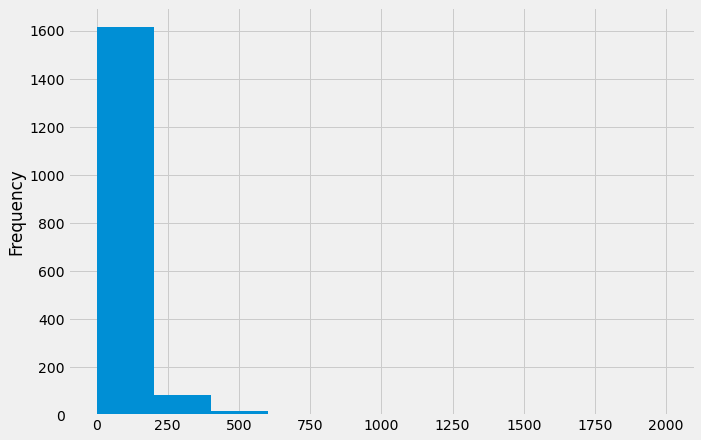

In [294]:
df.avg_item_sales.plot.hist()

/var/folders/x6/9q2vjsz90nx_0lgx5gr8g33w0000gn/T/ipykernel_27929/91656746.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])


(0.0, 300.0)

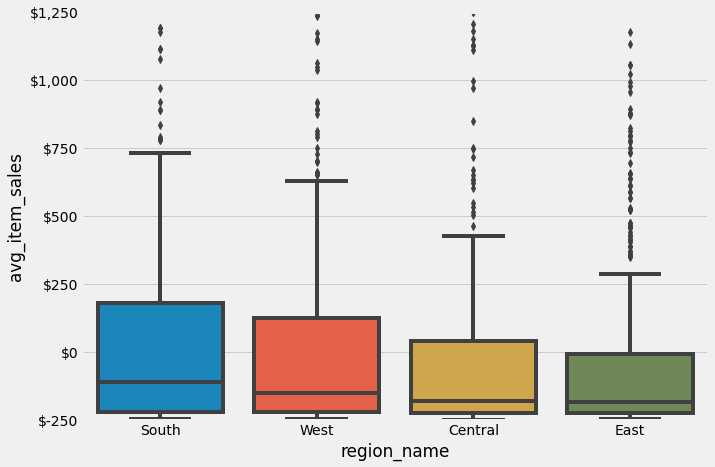

In [380]:

ax = sns.boxplot(x='region_name', y='avg_item_sales', data=df)
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
plt.ylim(0, 300)

In [377]:
# what is each region's top selling product?
df.groupby('region_name')['product_name'].get_group('Central').head(2)


order_date
2015-11-22    Holmes Replacement Filter for HEPA Air Cleaner...
2015-11-22     Storex DuraTech Recycled Plastic Frosted Binders
Name: product_name, dtype: object

In [171]:
df.head(1)

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.98,261.96,0.0


In [297]:
# rank the regions by profit
df.groupby('region_name')['profit'].mean().sort_values(ascending=False)

region_name
South      34.603028
West       33.978837
East       18.872376
Central     1.242639
Name: profit, dtype: float64

In [298]:
# how many orders were made in each region?
df.groupby('region_name')['order_id'].count().sort_values(ascending=False)

region_name
East       556
West       541
Central    389
South      248
Name: order_id, dtype: int64

In [174]:
# why many customers are in each segment for each region?
train.groupby(['segment', 'region_name'])['customer_name'].count().sort_values(ascending=False)
# train.groupby('segment')['customer_name'].count().sort_values(ascending=False)

segment      region_name
Consumer     West           166
             East           109
             Central         80
             South           66
Corporate    East            54
             West            51
Home Office  East            48
Corporate    Central         40
             South           32
Home Office  Central         29
             West            24
             South           13
Name: customer_name, dtype: int64

In [299]:
# how much does each segment make?
df.groupby('segment')['profit'].sum().sort_values(ascending=False)

segment
Consumer       20673.4058
Home Office    10386.4759
Corporate       6880.6476
Name: profit, dtype: float64

/var/folders/x6/9q2vjsz90nx_0lgx5gr8g33w0000gn/T/ipykernel_27929/1790903676.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])


(-25.0, 125.0)

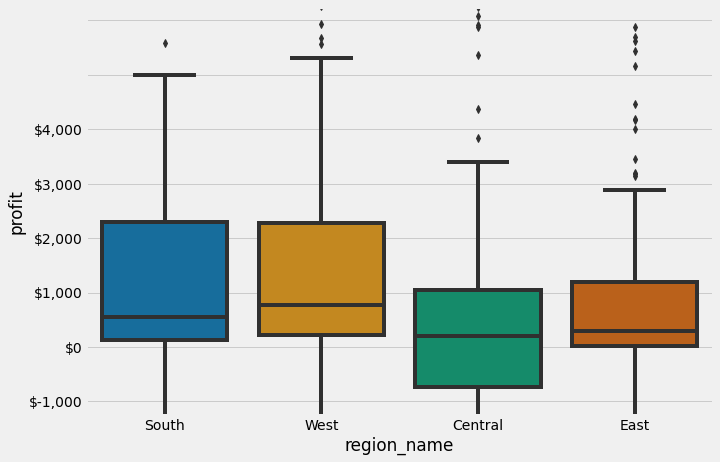

In [375]:

ax = sns.boxplot(data=train, y='profit', x='region_name', palette = 'colorblind')
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
plt.ylim(-25, 125)

In [368]:
y = df.profit
y.head()

order_date
2016-11-08     41.9136
2016-11-08    219.5820
2015-10-11   -383.0310
2015-10-11      2.5164
2017-04-15      5.4432
Name: profit, dtype: float64

<AxesSubplot:xlabel='order_date'>

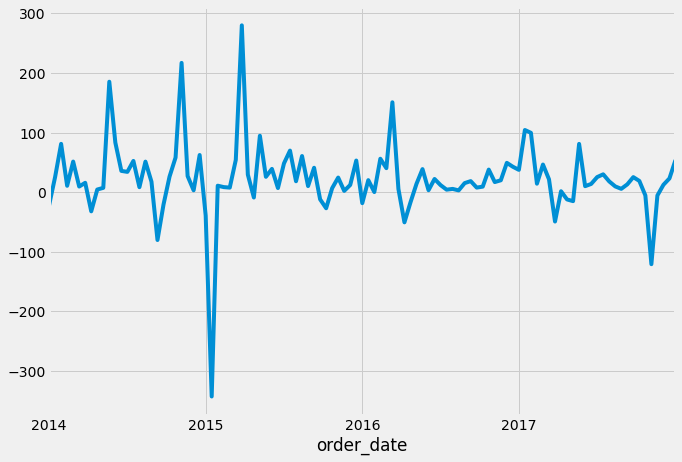

In [369]:
y.resample('2W').mean().plot()

<AxesSubplot:xlabel='order_date'>

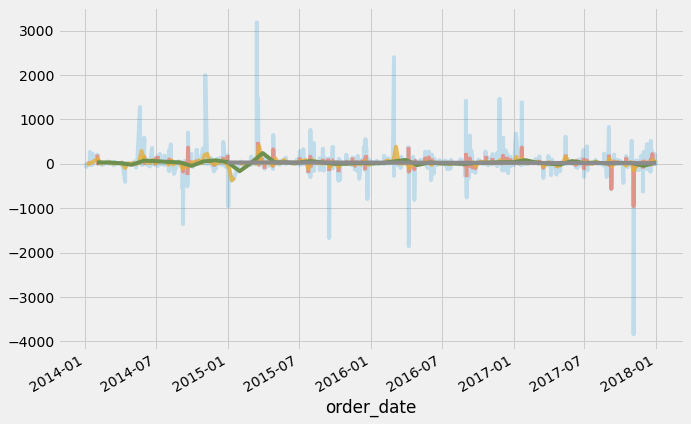

In [370]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
# plt.legend(bbox_to_anchor=(1.01, 1))


<AxesSubplot:title={'center':'Average Month-to-Month Change in Profit'}, xlabel='order_date'>

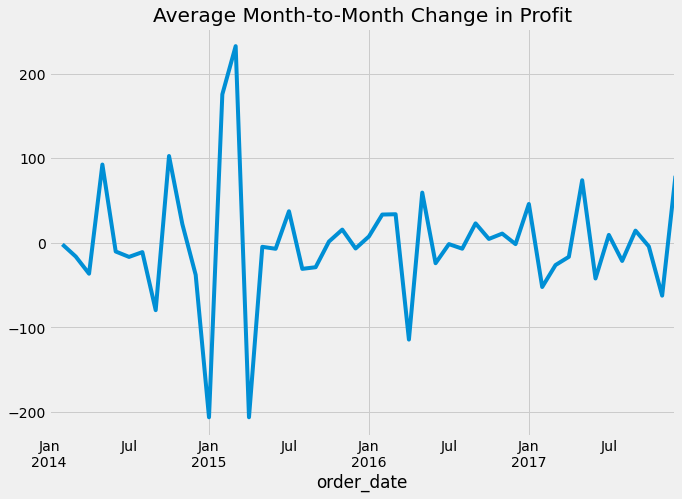

In [371]:

y.resample('M').mean().diff().plot(title='Average Month-to-Month Change in Profit')


<AxesSubplot:title={'center':'Average Bi-Weekly Change in Profit'}, xlabel='order_date'>

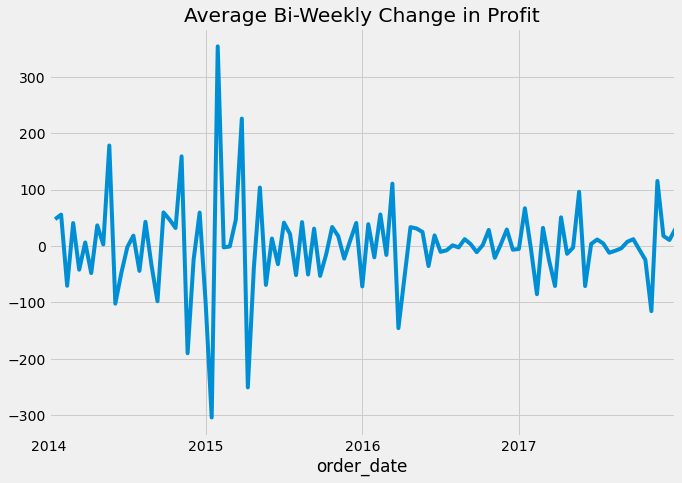

In [372]:

y.resample('2W').mean().diff().plot(title='Average Bi-Weekly Change in Profit')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='order_date'>

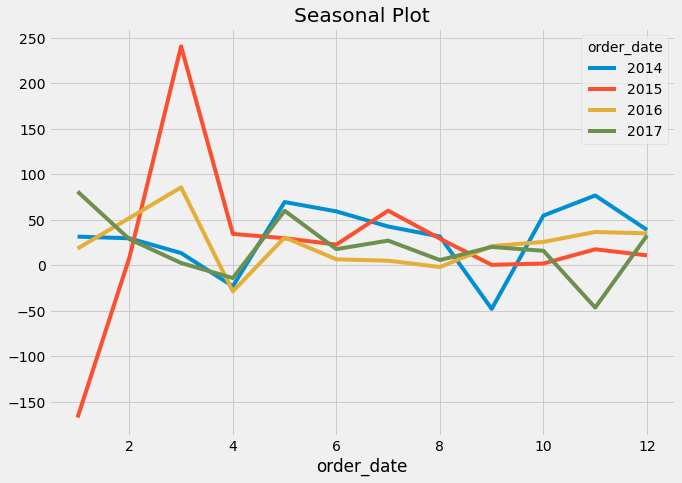

In [373]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [374]:
# train.groupby('customer_name')['profit'].mean().sort_values(ascending=False)

In [184]:
# df.groupby('customer_name')['profit'].mean().sort_values(ascending=False)

In [307]:
# train.head()

In [308]:
# what product is the top selling product in the central region?
df.groupby(['region_name', 'product_name'])['profit'].sum().sort_values(ascending=False)

region_name  product_name                                                               
South        Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    3177.4750
East         Ativa V4110MDD Micro-Cut Shredder                                              2400.9657
             Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier          1995.9900
West         Canon PC940 Copier                                                             1480.4671
South        Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer                  1459.2000
                                                                                              ...    
East         Cisco 9971 IP Video Phone Charcoal                                             -950.4000
Central      Lexmark MX611dhe Monochrome Laser Printer                                     -1189.9930
East         Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish                 -166

In [309]:
df.region_name.value_counts()

East       556
West       541
Central    389
South      248
Name: region_name, dtype: int64

In [310]:
# Create trains for each region
df_east = df[df.region_name == 'East']
df_west = df[df.region_name == 'West']
df_south = df[df.region_name == 'South']
df_central = df[df.region_name == 'Central']

In [311]:
bottom_five_central = pd.DataFrame(df_central.groupby(['product_name'])['profit'].sum().sort_values(ascending=True))
bottom_five_central.head(5)

,profit
product_name,
GBC DocuBind P400 Electric Binding System,-1850.9464
Lexmark MX611dhe Monochrome Laser Printer,-1189.9930
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,-566.5625
Kensington 7 Outlet MasterPiece Power Center,-453.8490
"Bevis Oval Conference Table, Walnut",-430.6170


In [312]:
top_five_central = pd.DataFrame(df_central.groupby(['product_name'])['profit'].sum().sort_values(ascending=False))
top_five_central.head(5)

,profit
product_name,
Maxell iVDR EX 500GB Cartridge,829.3754
"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",585.5520
Global Deluxe High-Back Manager's Chair,571.9600
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room,496.0725
Mitel MiVoice 5330e IP Phone,434.4842


In [313]:
bottom_five_central_disc = df_central.groupby(['product_name'])['discount'].sum().sort_values(ascending=False)
bottom_five_central_disc.head()

product_name
GBC Imprintable Covers                           1.6
Avery Hidden Tab Dividers for Binding Systems    1.6
Eldon 100 Class Desk Accessories                 1.2
Lexmark MX611dhe Monochrome Laser Printer        0.9
Premier Elliptical Ring Binder, Black            0.8
Name: discount, dtype: float64

In [314]:
# what item was ordered the most in the central region?
df_central.groupby(['product_name'])['quantity'].sum().sort_values(ascending=False)

product_name
Staples                                                                        16.0
Fellowes Bankers Box Stor/Drawer Steel Plus                                    15.0
Global Stack Chair without Arms, Black                                         14.0
Space Solutions Commercial Steel Shelving                                      14.0
Plantronics Cordless Phone Headset with In-line Volume - M214C                 13.0
                                                                               ... 
Acme Elite Stainless Steel Scissors                                             1.0
Logitech LS21 Speaker System - PC Multimedia - 2.1-CH - Wired                   1.0
Belkin iPhone and iPad Lightning Cable                                          1.0
DXL Angle-View Binders with Locking Rings by Samsill                            1.0
Ampad Poly Cover Wirebound Steno Book, 6" x 9" Assorted Colors, Gregg Ruled     1.0
Name: quantity, Length: 347, dtype: float64

In [315]:
# what is the averagae profit per order in the central region?  
df_central.groupby(['product_name'])['profit'].sum().sort_values(ascending=False)

product_name
Maxell iVDR EX 500GB Cartridge                                         829.3754
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back            585.5520
Global Deluxe High-Back Manager's Chair                                571.9600
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room     496.0725
Mitel MiVoice 5330e IP Phone                                           434.4842
                                                                        ...    
Bevis Oval Conference Table, Walnut                                   -430.6170
Kensington 7 Outlet MasterPiece Power Center                          -453.8490
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables     -566.5625
Lexmark MX611dhe Monochrome Laser Printer                            -1189.9930
GBC DocuBind P400 Electric Binding System                            -1850.9464
Name: profit, Length: 347, dtype: float64

In [194]:
# what is the average profit per order in each region?
df.groupby(['region_name'])['profit'].mean().sort_values(ascending=False)

region_name
South      70.838768
West       41.371367
East       12.283032
Central    -2.532370
Name: profit, dtype: float64

In [317]:
# What is the percentage of profit that is lost due to discounts?
df.groupby(['region_name'])['discount'].sum().sort_values(ascending=False)

region_name
Central    89.78
East       87.90
West       65.50
South      34.45
Name: discount, dtype: float64

In [196]:
# What category of products are the most profitable?
train.groupby(['category'])['profit'].sum().sort_values(ascending=False)

category
Office Supplies    10362.1275
Technology          9854.7304
Furniture           -168.8585
Name: profit, dtype: float64

In [318]:
# What category of products has the highest discount?
df.groupby(['category'])['discount'].sum().sort_values(ascending=False)

category
Office Supplies    169.80
Furniture           62.03
Technology          45.80
Name: discount, dtype: float64

In [319]:

df_central.groupby(['city'])['profit'].sum().sort_values(ascending=True)

city
Houston       -2676.3820
San Antonio   -1889.2576
Chicago       -1279.5504
Aurora         -614.6830
Tyler          -443.7086
                 ...    
Dearborn        444.2672
Franklin        775.9808
Jackson        1285.2278
Lakeville      1297.9521
Detroit        1869.1643
Name: profit, Length: 75, dtype: float64

In [321]:
texas = train_central.loc[train_central['state'] == 'Texas']
texas.head()

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2015-11-22,US-2015-118983,2015-11-26,Standard Class,Home Office,Fort Worth,Texas,76106.0,68.8100,5.0,0.80,-123.8580,Office Supplies,Appliances,Harold Pawlan,Holmes Replacement Filter for HEPA Air Cleaner...,Central,13.7620,69.6100,1.149260
2015-11-22,US-2015-118983,2015-11-26,Standard Class,Home Office,Fort Worth,Texas,76106.0,2.5440,3.0,0.80,-3.8160,Office Supplies,Binders,Harold Pawlan,Storex DuraTech Recycled Plastic Frosted Binders,Central,0.8480,3.3440,23.923445
2015-12-27,CA-2015-117415,2015-12-31,Standard Class,Home Office,Houston,Texas,77041.0,113.3280,9.0,0.20,35.4150,Office Supplies,Envelopes,Steve Nguyen,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",Central,12.5920,113.5280,0.176168
2015-12-27,CA-2015-117415,2015-12-31,Standard Class,Home Office,Houston,Texas,77041.0,532.3992,3.0,0.32,-46.9764,Furniture,Bookcases,Steve Nguyen,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",Central,177.4664,532.7192,0.060069
2015-12-27,CA-2015-117415,2015-12-31,Standard Class,Home Office,Houston,Texas,77041.0,212.0580,3.0,0.30,-15.1470,Furniture,Chairs,Steve Nguyen,"Global Fabric Manager's Chair, Dark Gray",Central,70.6860,212.3580,0.141271


In [322]:
y = texas.profit

<AxesSubplot:ylabel='Frequency'>

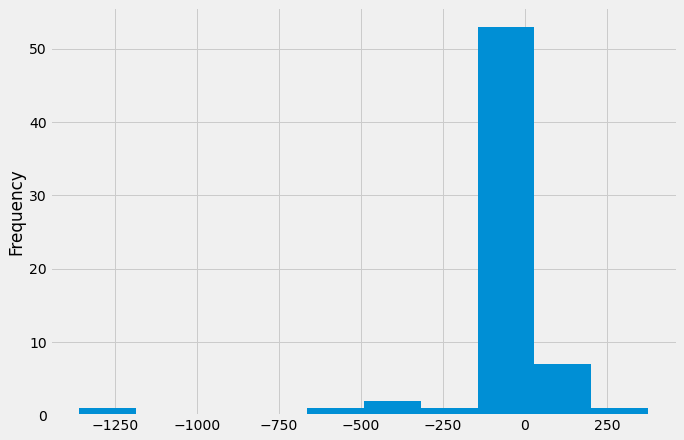

In [323]:
y.plot.hist()

<AxesSubplot:xlabel='product_name'>

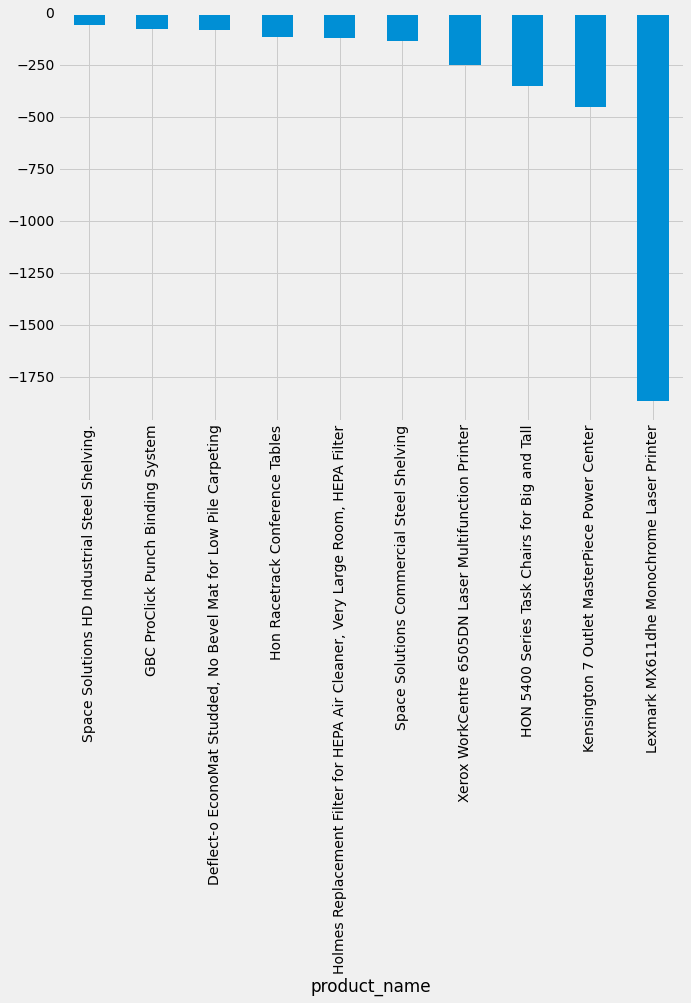

In [324]:
# what are the top products in san antonio?
texas.groupby(['product_name'])['profit'].sum().sort_values(ascending=False).tail(10).plot.bar()


<AxesSubplot:xlabel='product_name'>

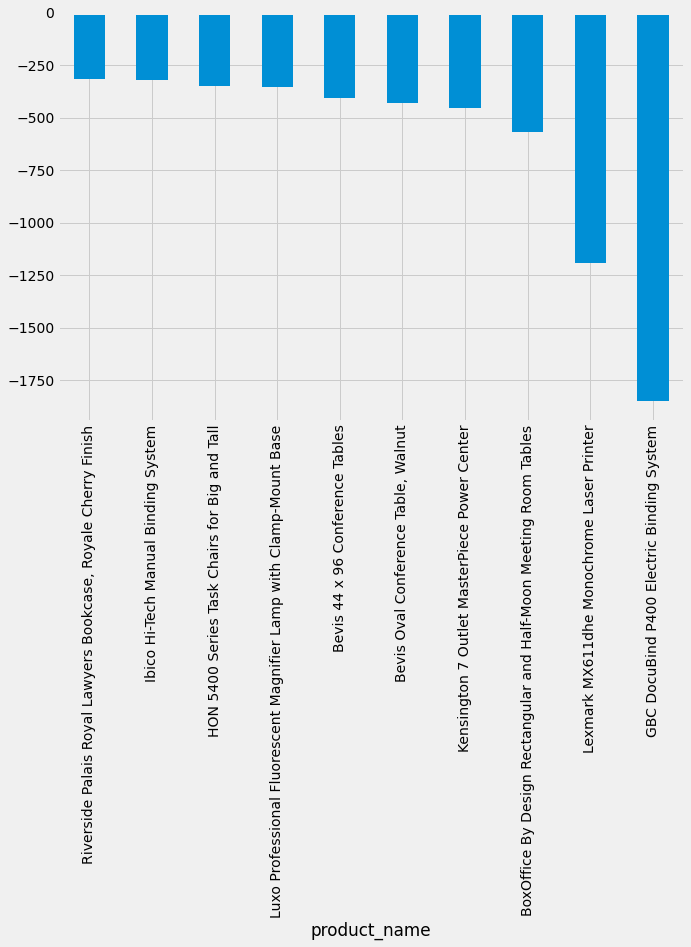

In [325]:
df_central.groupby(['product_name'])['profit'].sum().sort_values(ascending=False).tail(10).plot.bar()


<AxesSubplot:xlabel='city'>

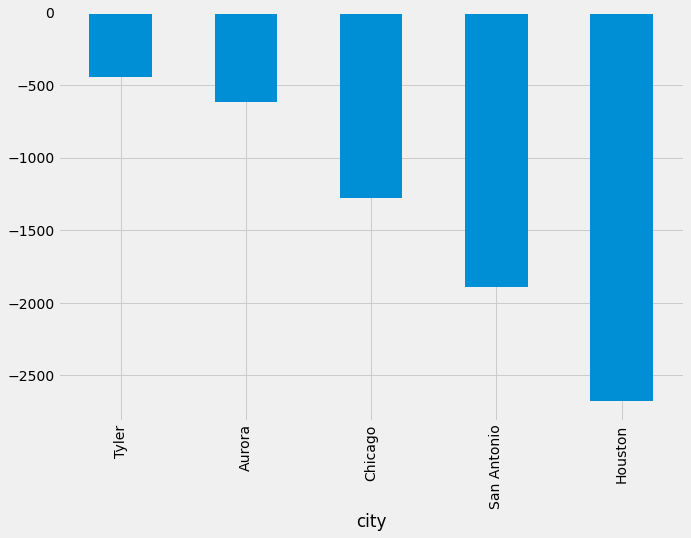

In [326]:
# Show me the bottom five cities in the central region in profit?   
df_central.groupby(['city'])['profit'].sum().sort_values(ascending=False).tail(5).plot.bar()



In [327]:
# select only printers in product_name
df_printers = df.loc[df['product_name'].str.contains('Printer')]
central_printers = df_printers.loc[df_printers['region_name'] == 'Central']
sa_printers = df_printers.loc[df_printers['city'] == 'San Antonio']


<AxesSubplot:xlabel='city'>

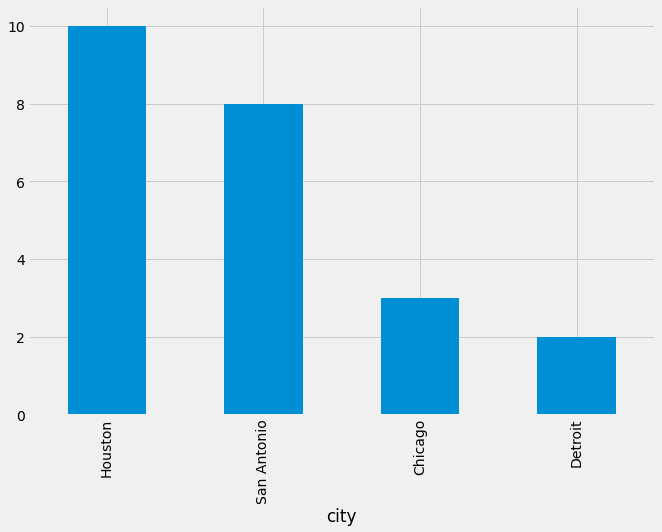

In [328]:
# how many printers were sold in san antonio vs central region?
central_printers.groupby(['city'])['quantity'].sum().sort_values(ascending=False).plot.bar()

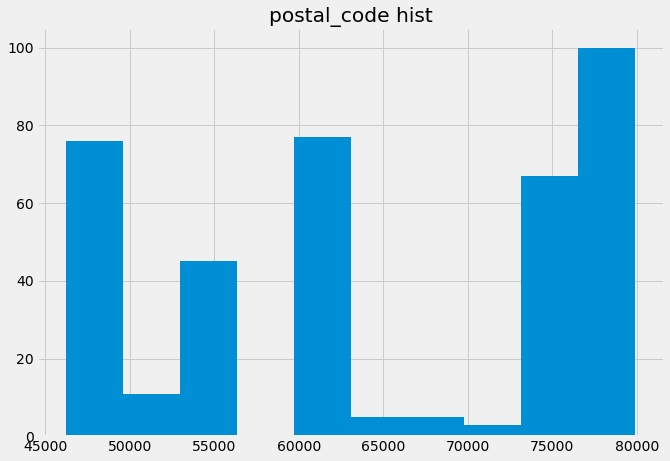

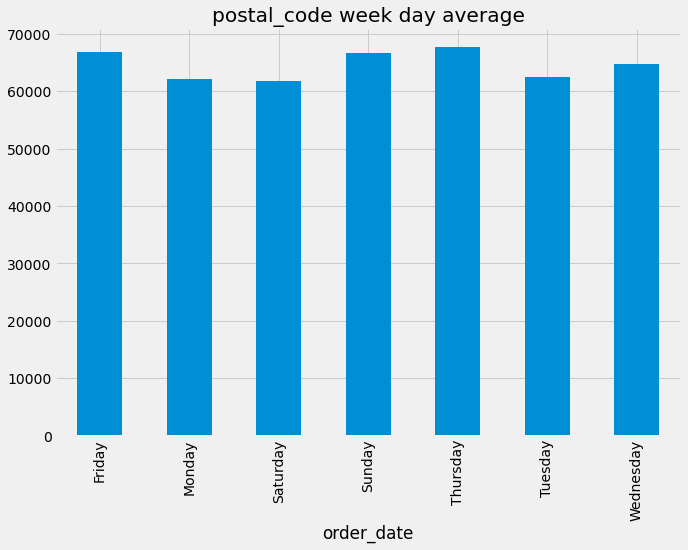

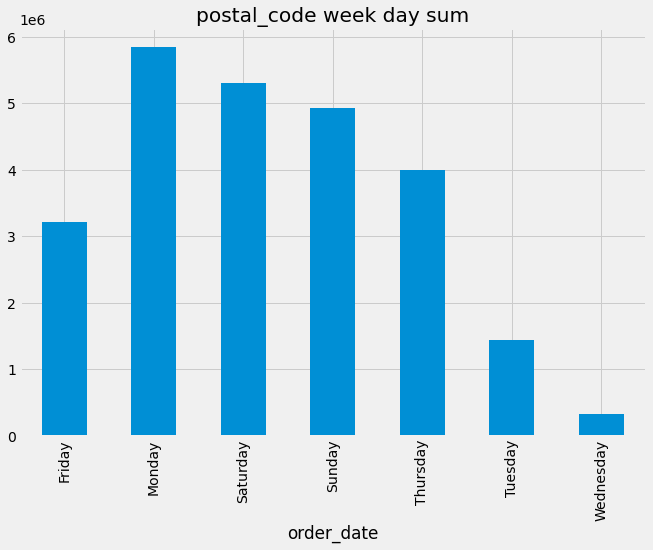

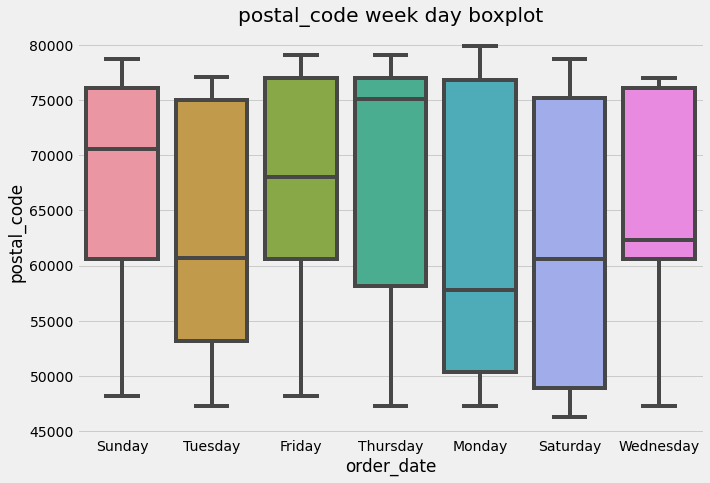

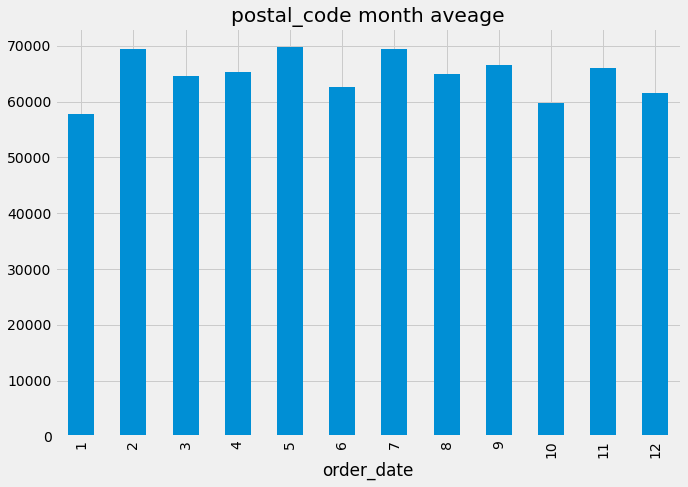

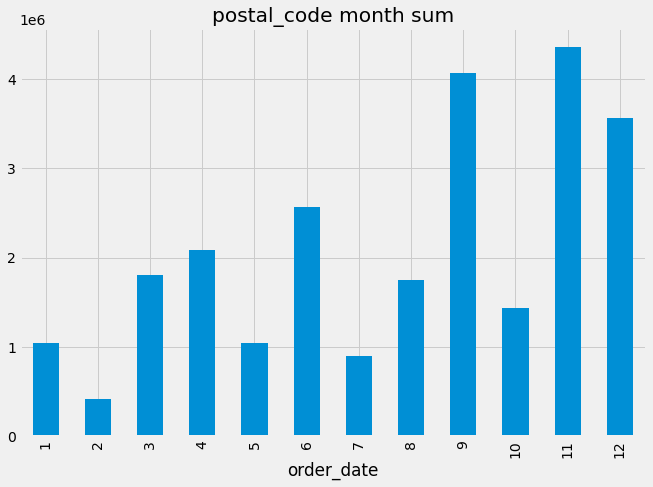

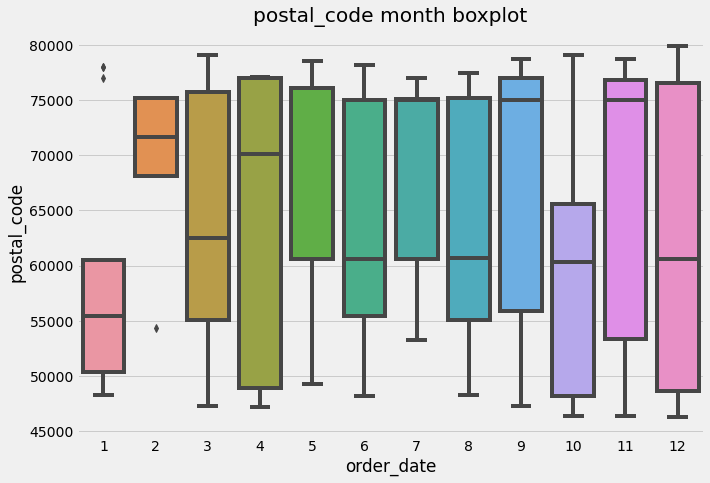

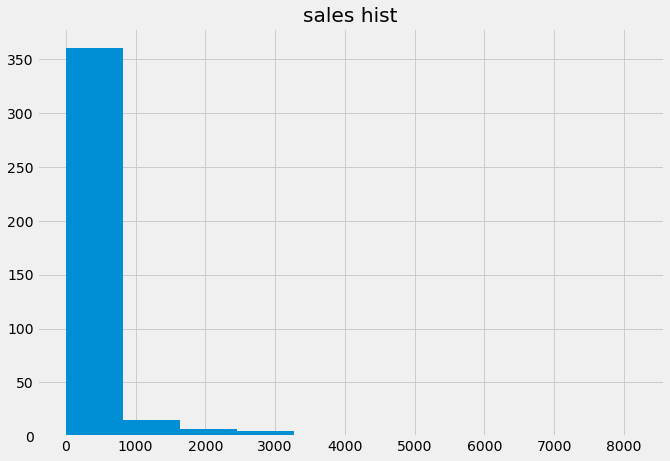

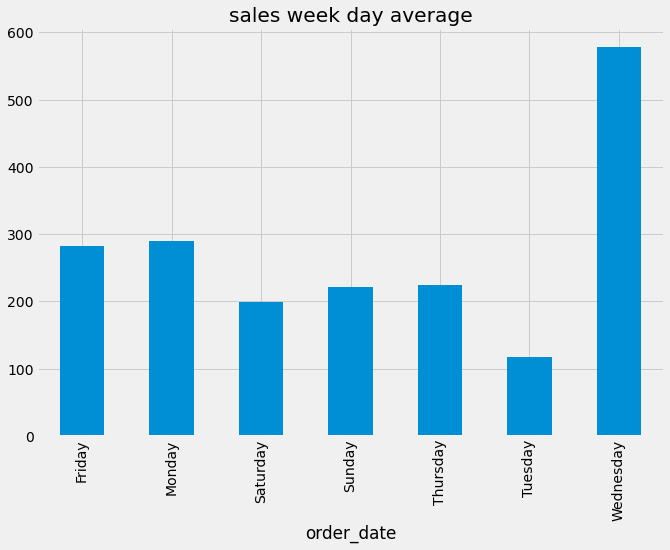

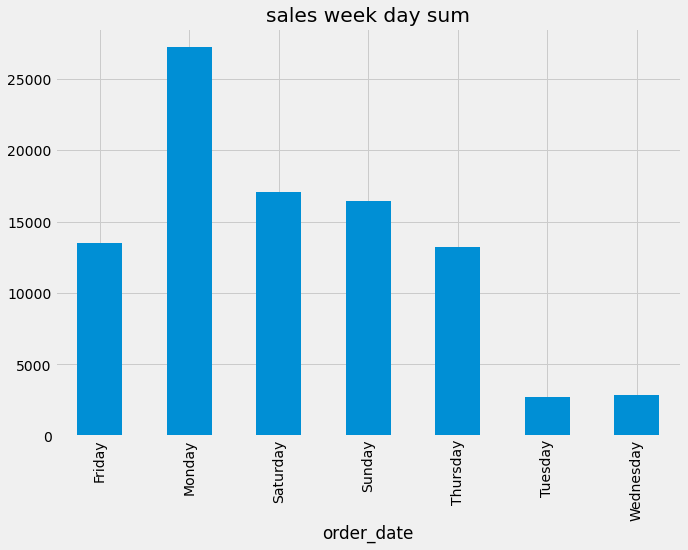

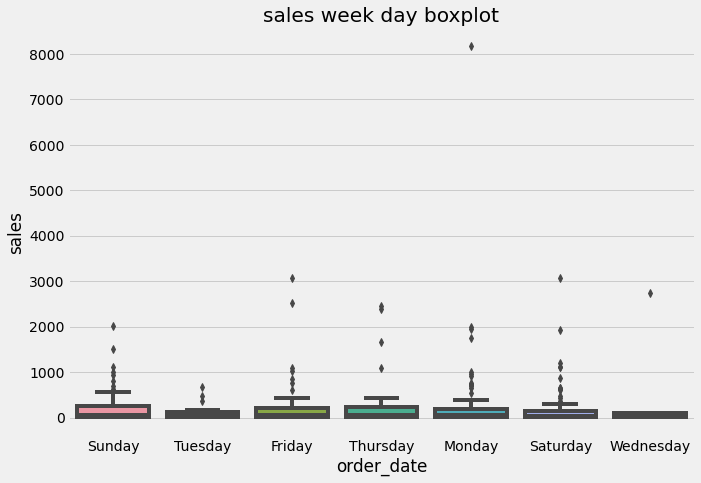

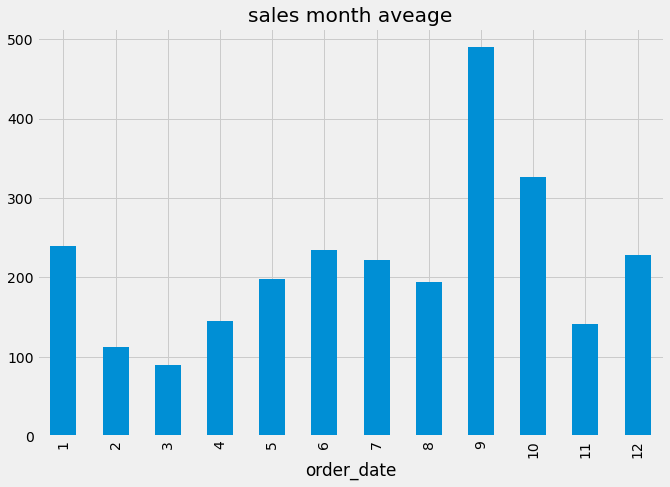

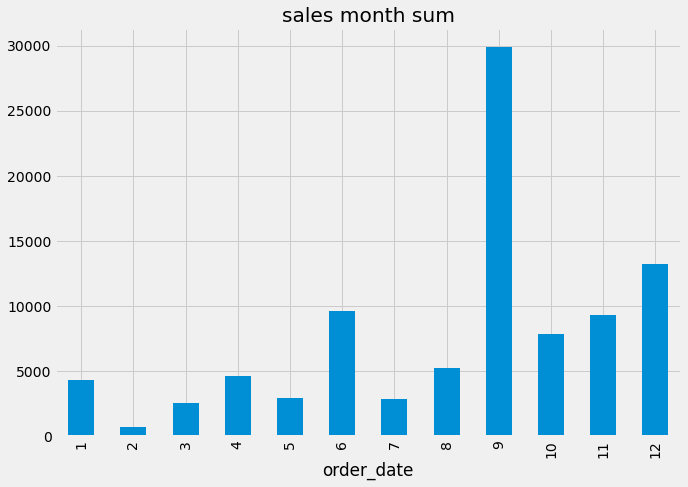

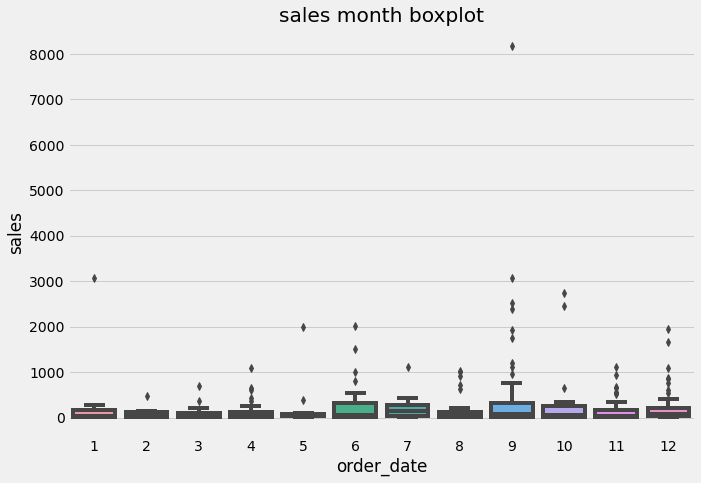

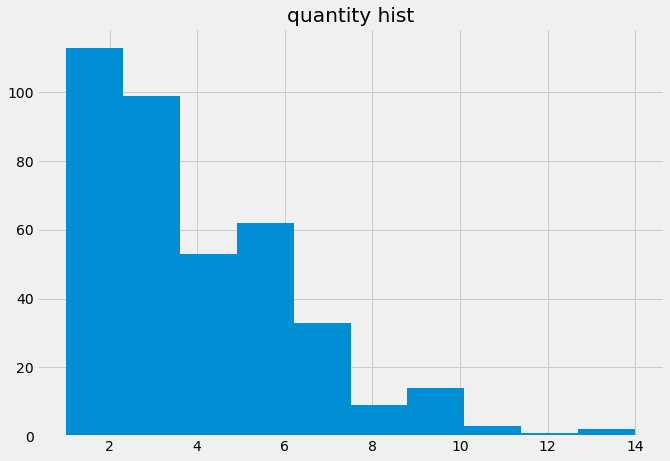

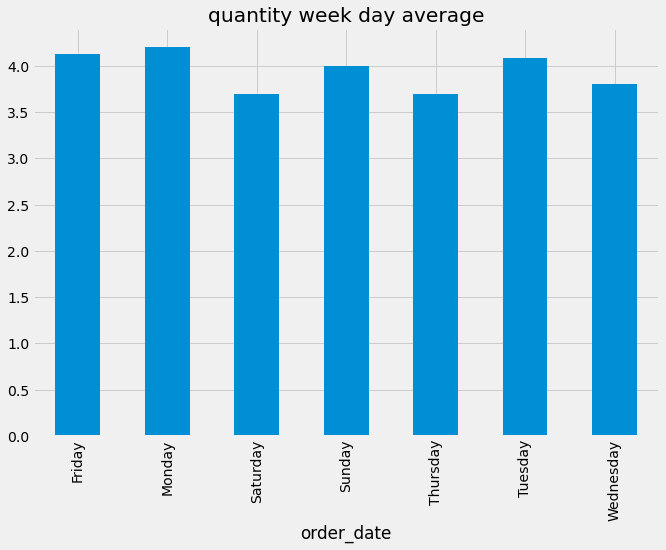

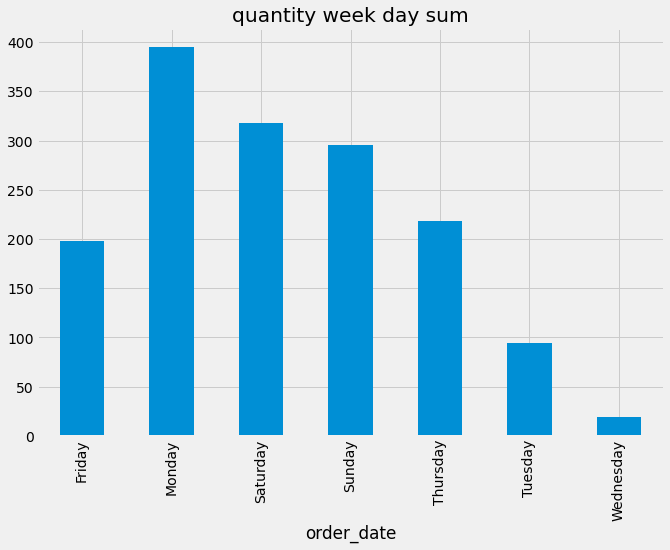

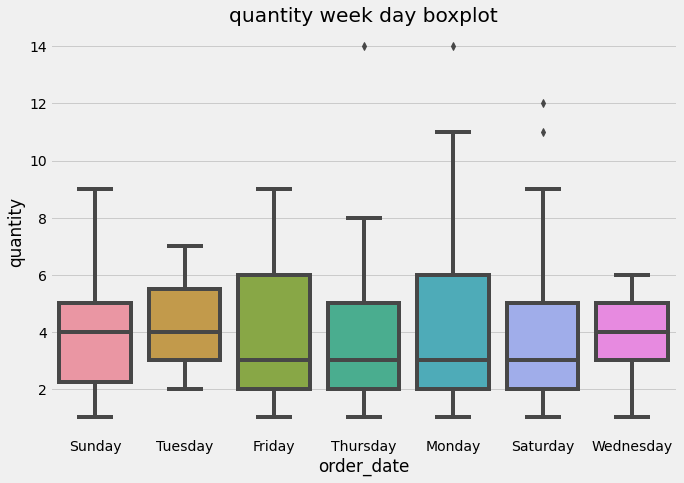

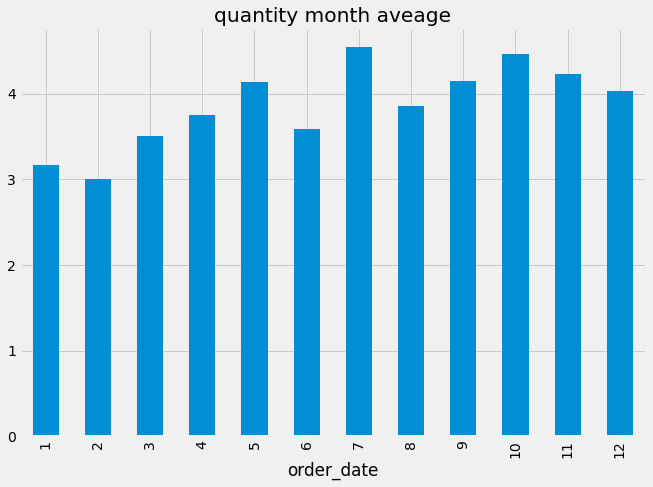

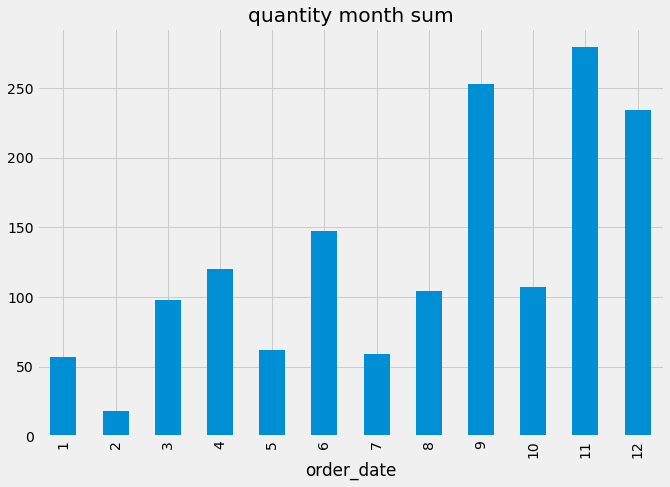

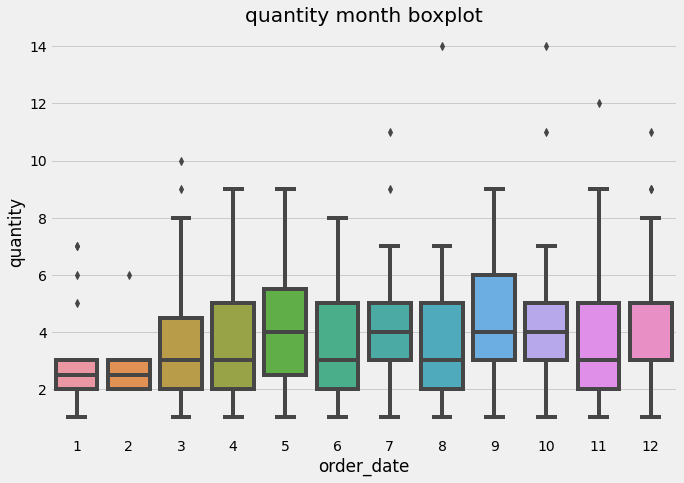

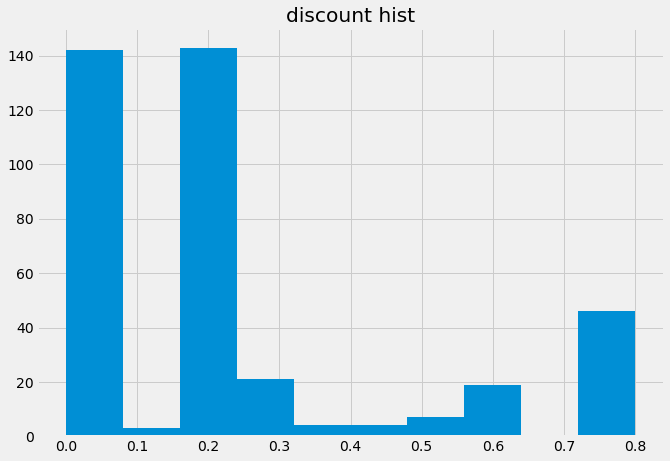

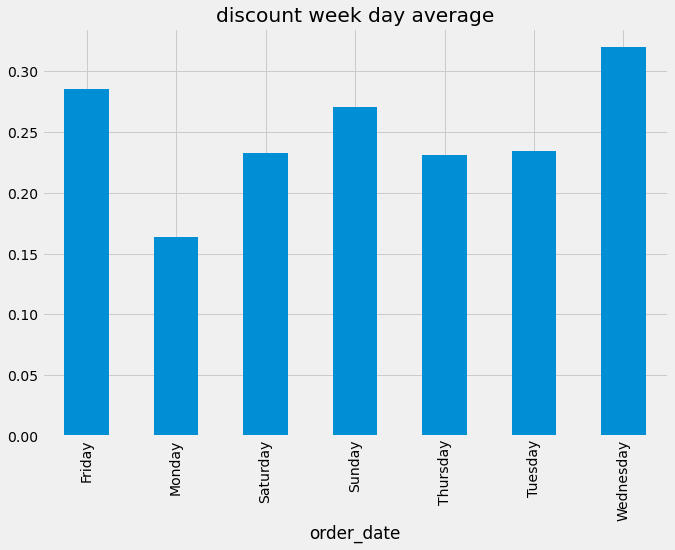

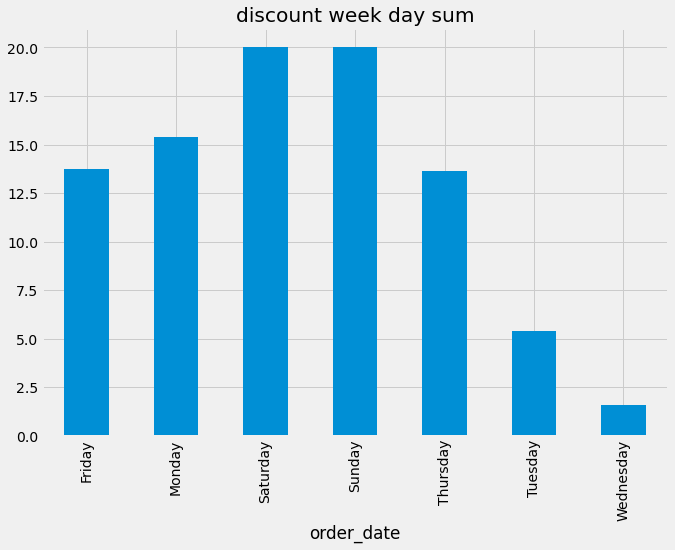

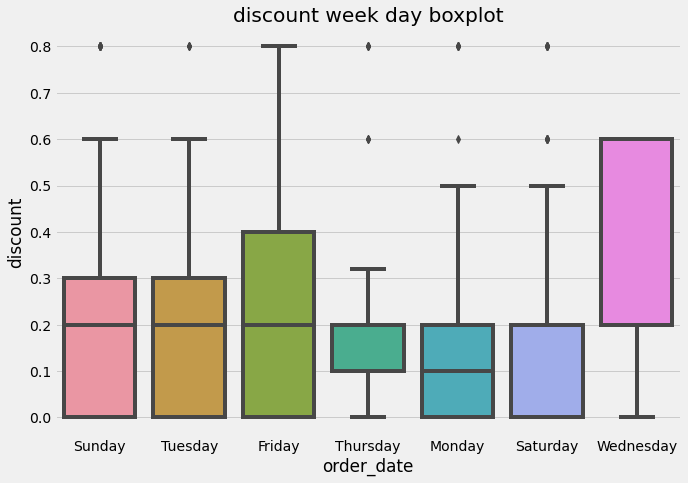

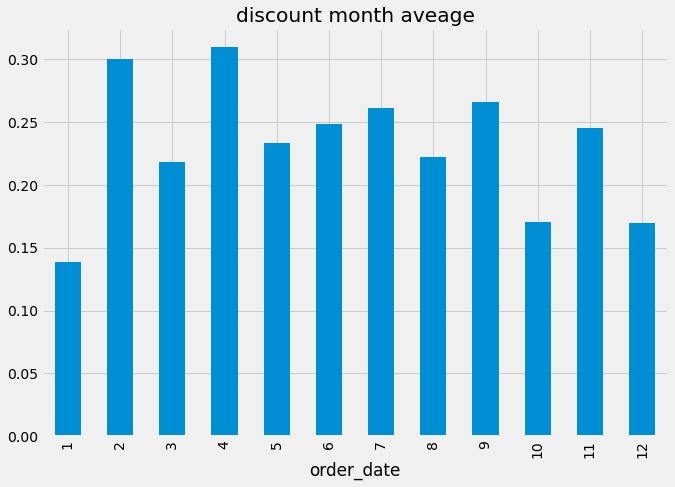

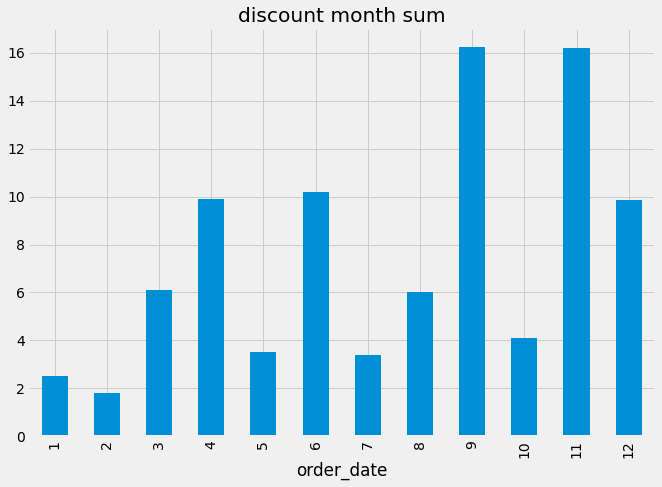

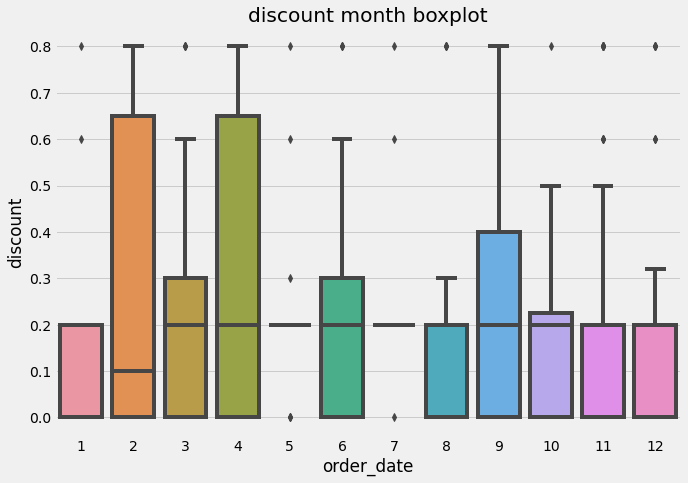

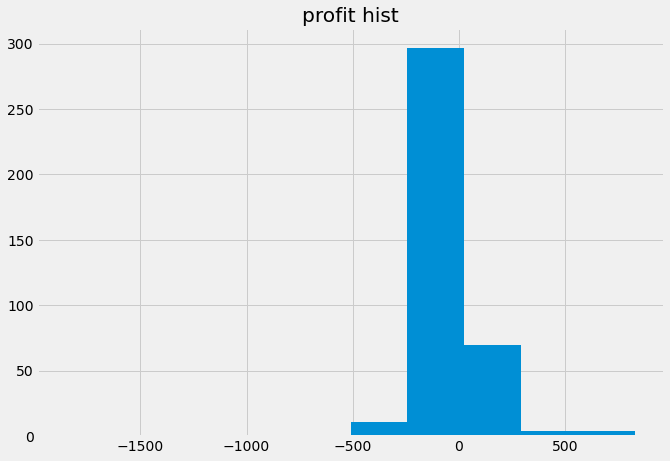

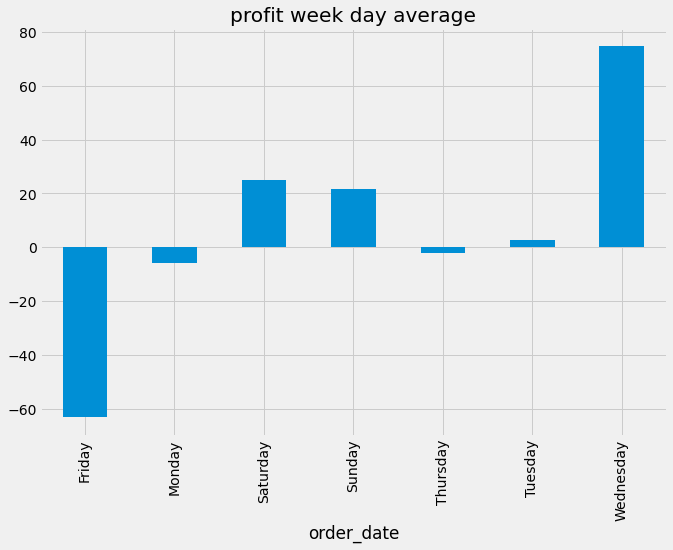

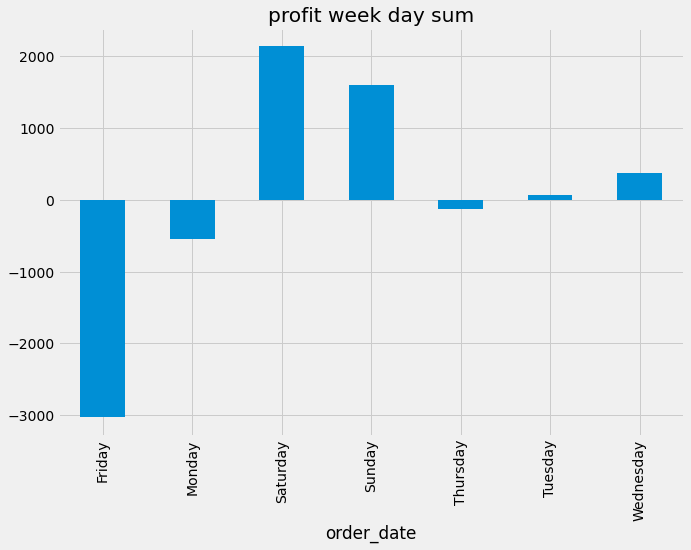

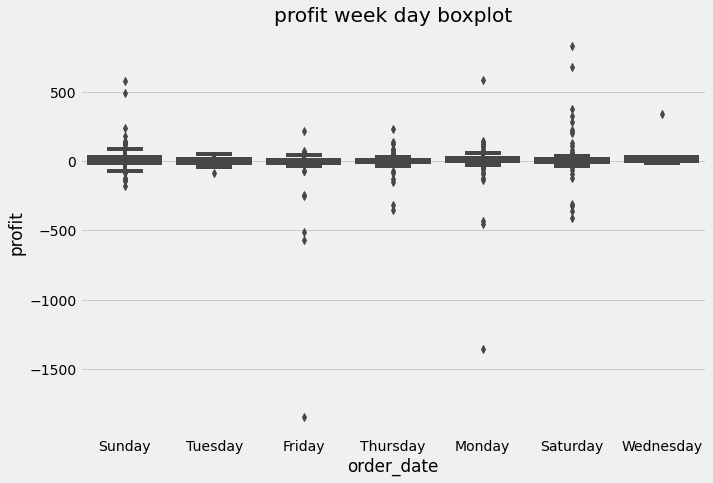

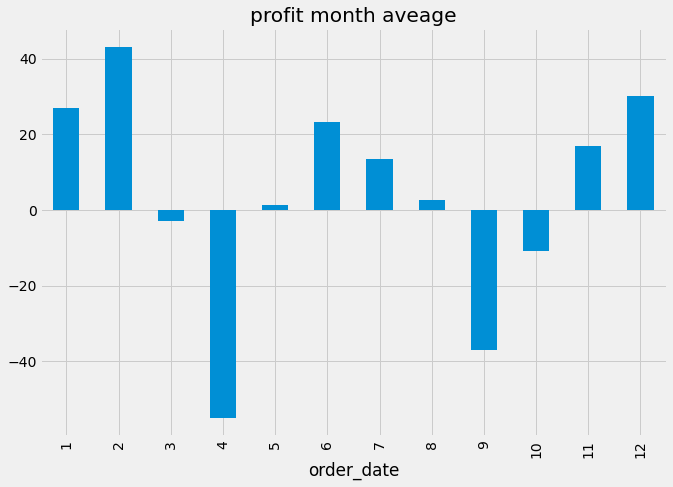

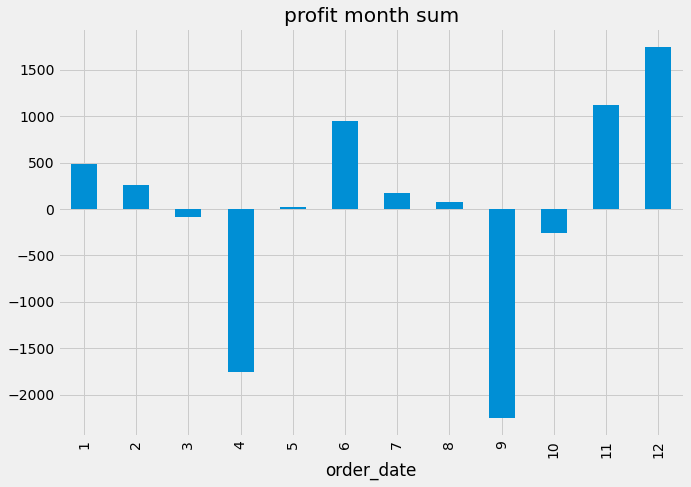

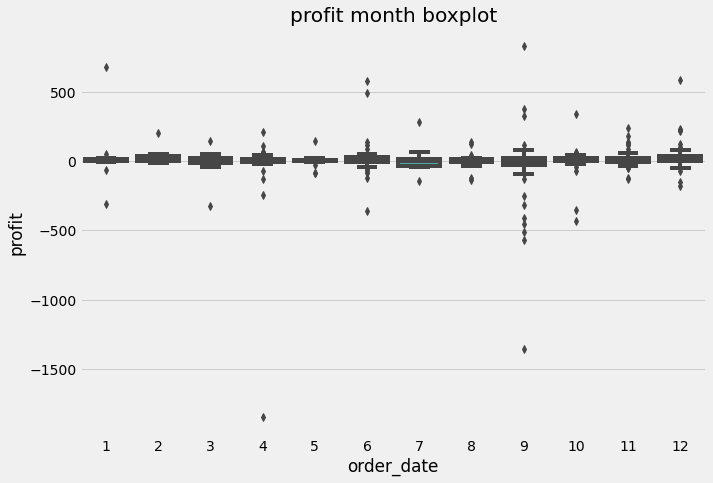

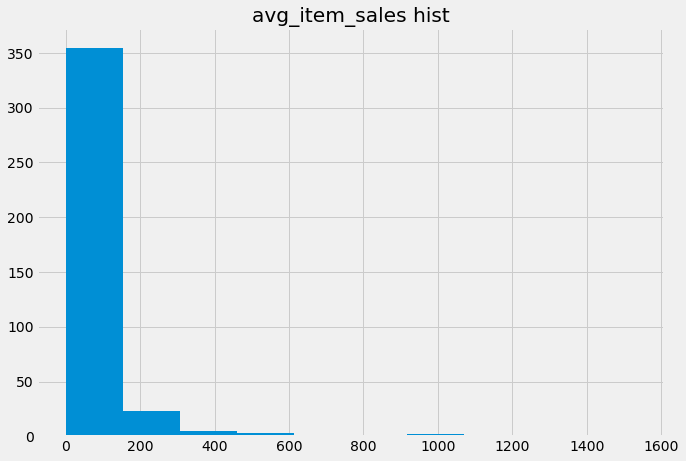

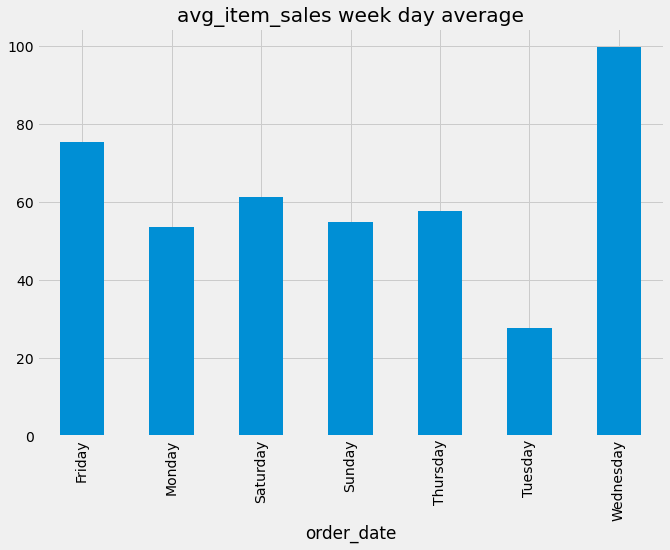

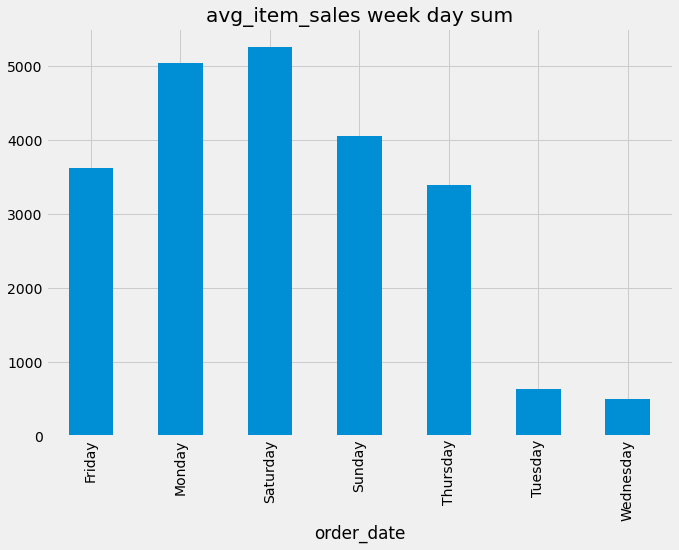

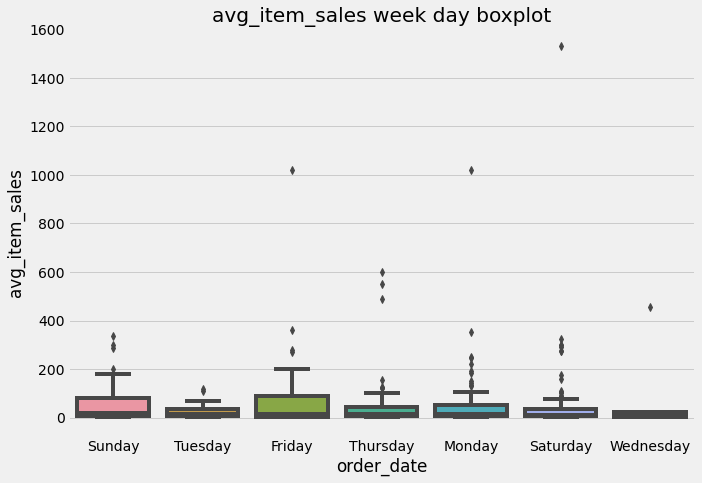

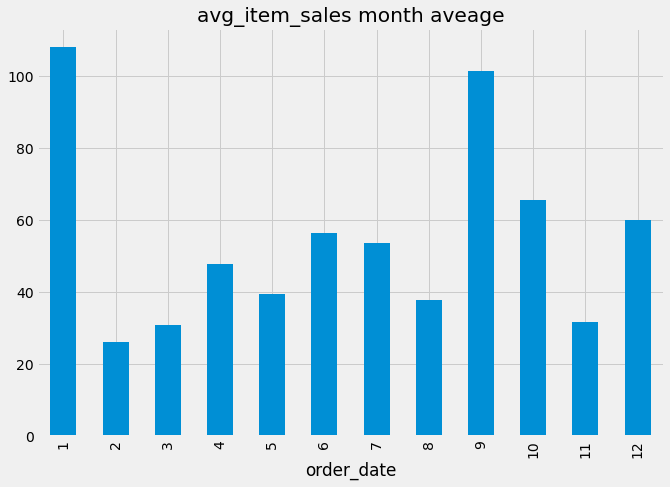

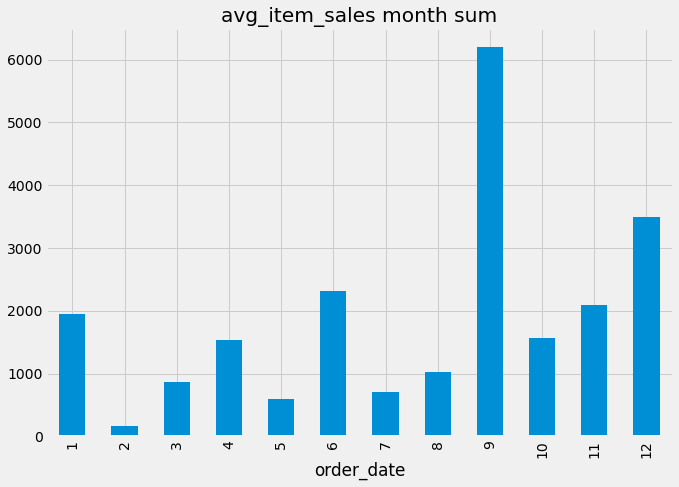

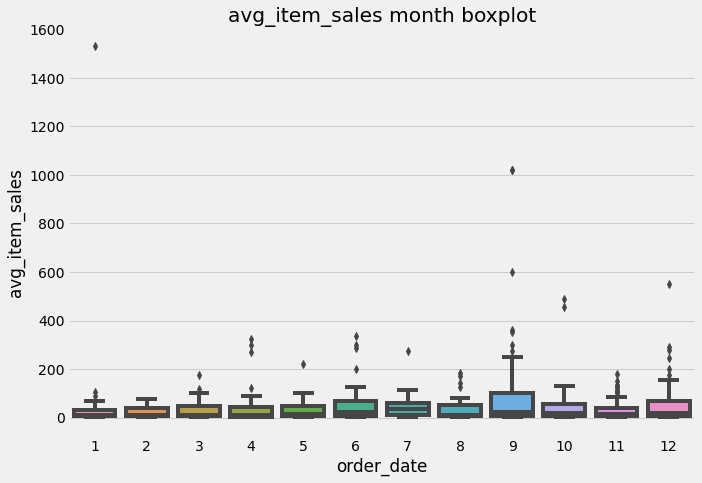

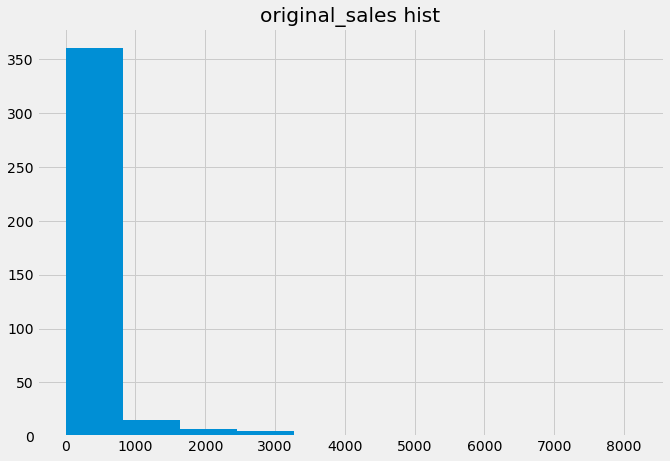

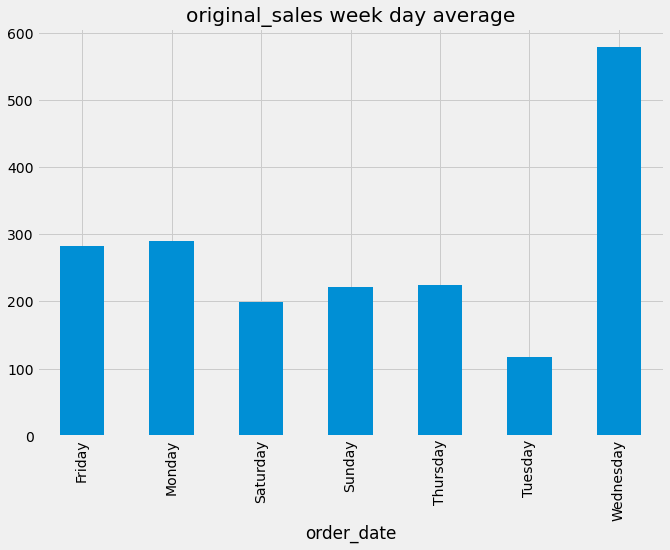

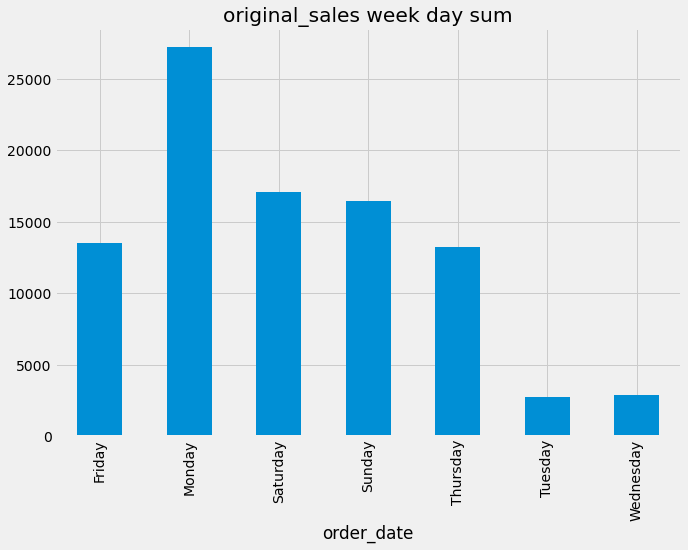

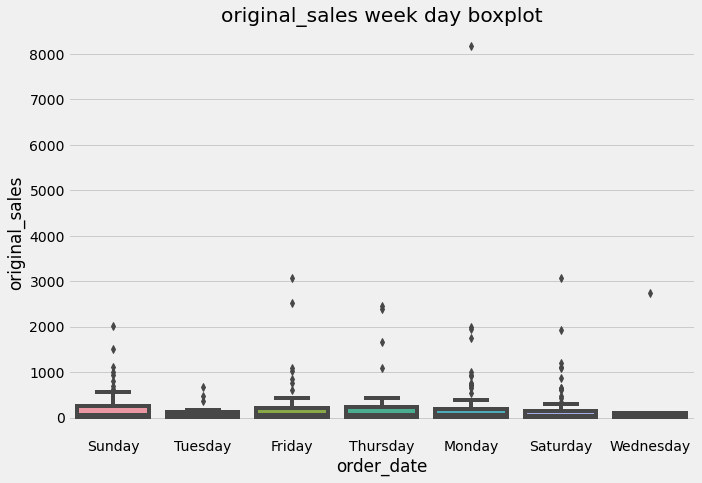

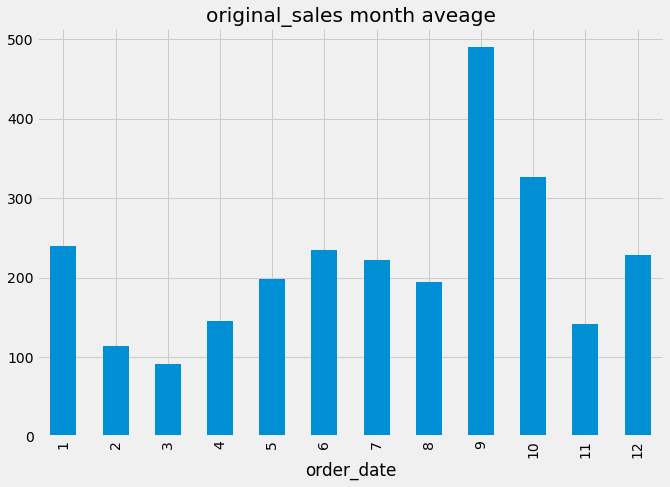

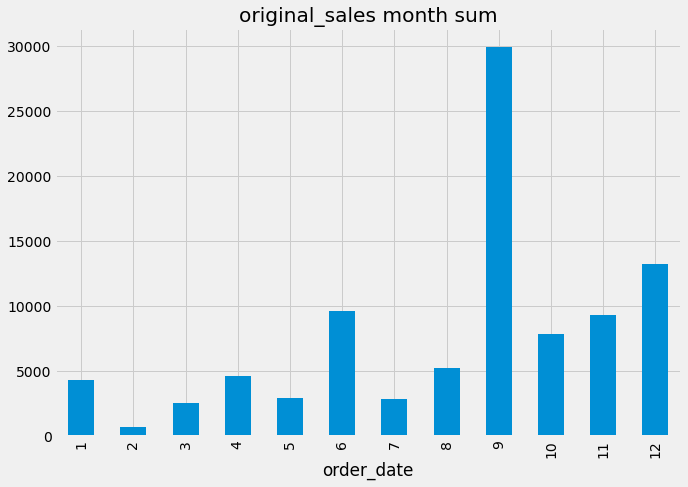

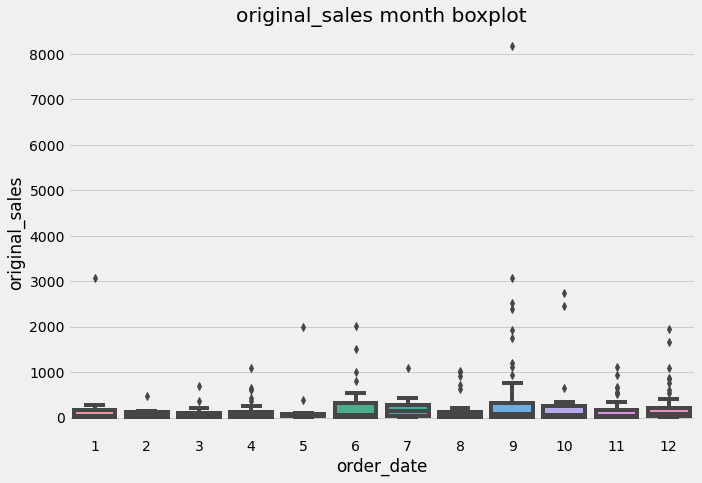

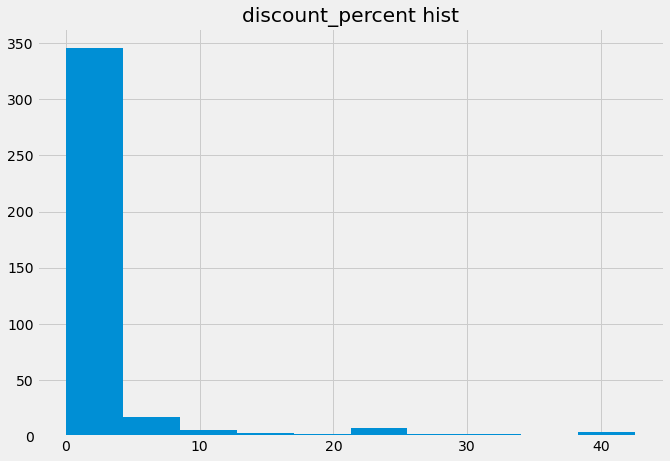

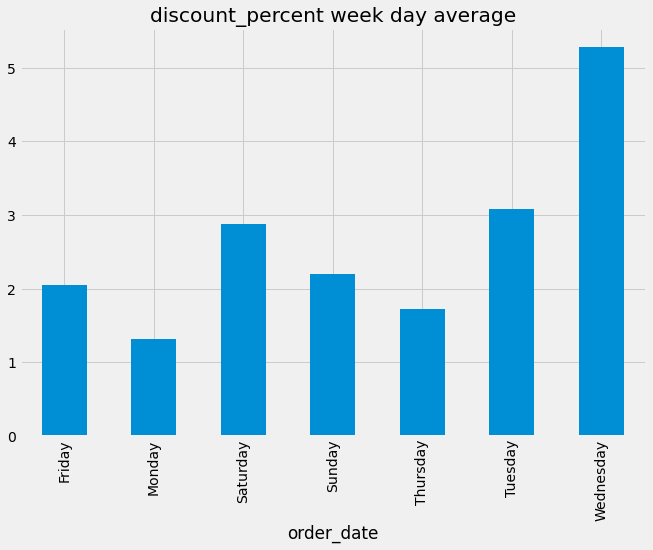

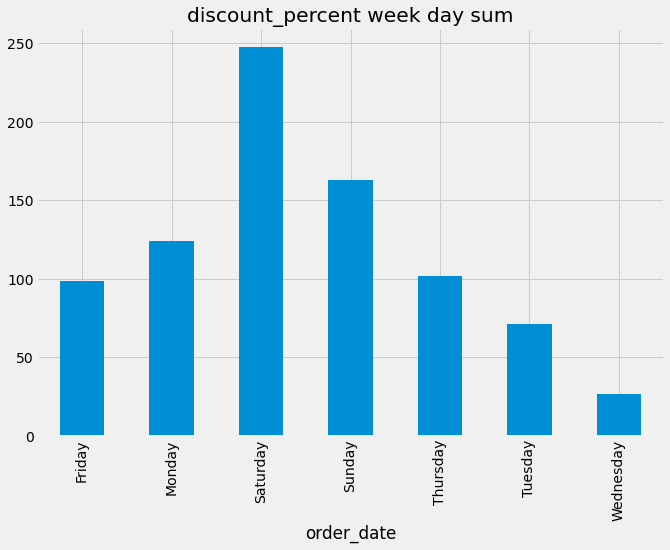

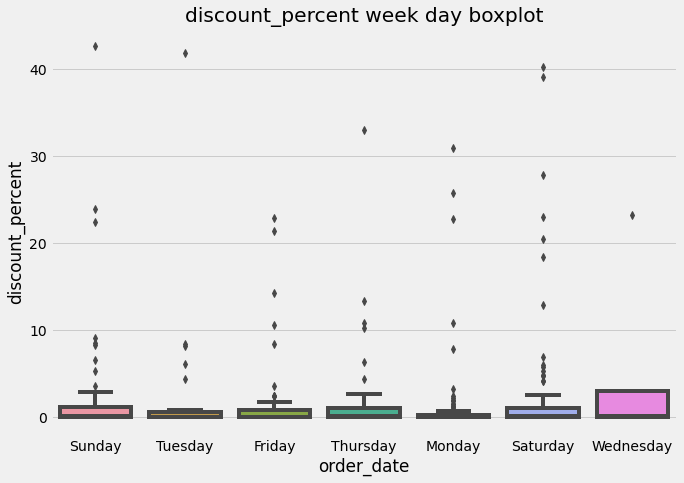

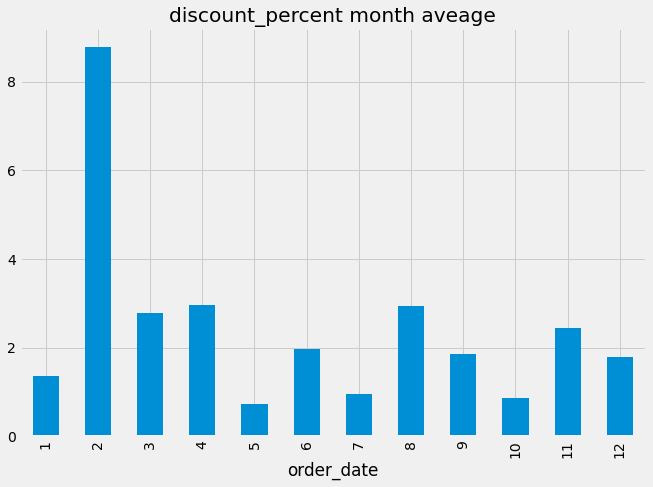

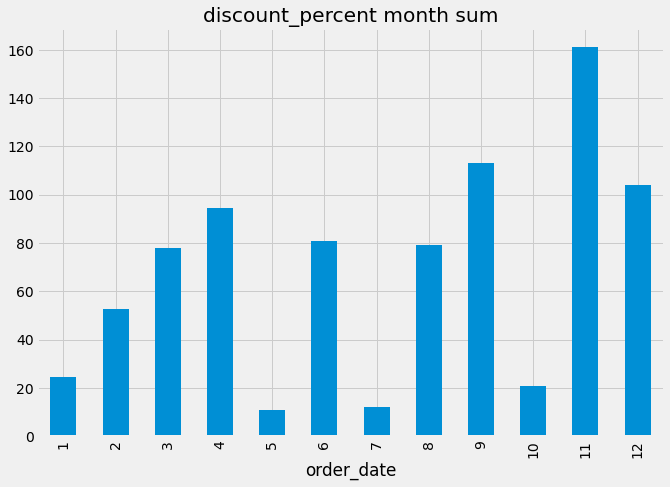

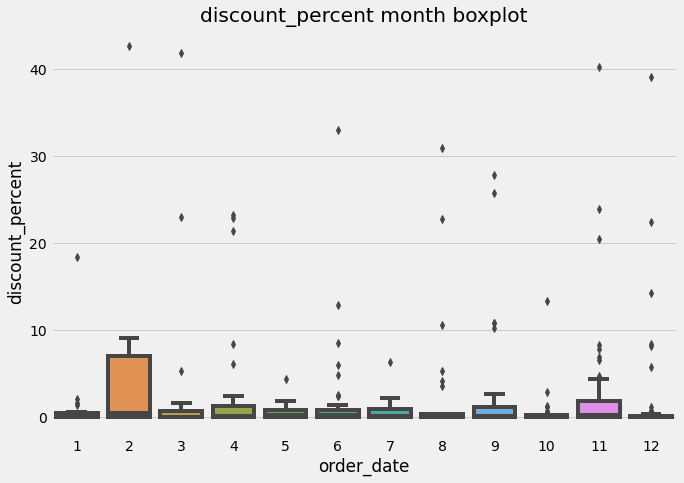

In [329]:
for col in df_central.columns[df_central.dtypes == float]:
    plt.hist(df_central[col])
    plt.title(col +' hist')
    plt.show()
    df_central.groupby(df_central.index.day_name())[col].mean().plot.bar()
    plt.title(col + ' week day average')
    plt.show()
    df_central.groupby(df_central.index.day_name())[col].sum().plot.bar()
    plt.title(col + ' week day sum')
    plt.show()
    sns.boxplot(data=df_central, y=col, x=df_central.index.day_name())
    plt.title(col + ' week day boxplot')
    plt.show()
    df_central.groupby(df_central.index.month)[col].mean().plot.bar()
    plt.title(col + ' month aveage')
    plt.show()
    df_central.groupby(df_central.index.month)[col].sum().plot.bar()
    plt.title(col + ' month sum')
    plt.show()
    sns.boxplot(data=df_central, y=col, x=df_central.index.month)
    plt.title(col + ' month boxplot')
    plt.show()
   

In [330]:
df.head(2)

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.98,261.96,0.0
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,731.94,3.0,0.0,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,243.98,731.94,0.0


In [209]:
# what category of products are the most profitable?
pd.DataFrame(df.groupby(['category'])['profit'].sum().sort_values(ascending=False))


,profit
category,
Office Supplies,10362.1275
Technology,9854.7304
Furniture,-168.8585


#### Market towards furniture categories?

In [332]:
# what was the average discount of furniture?
pd.DataFrame(df.groupby(['category'])['discount'].sum().sort_values(ascending=False))

,discount
category,
Office Supplies,169.80
Furniture,62.03
Technology,45.80


#### Furniture was discounted more than tech but still was not profitable.

In [333]:
# how profitable was each segment of the product category?
pd.DataFrame(df.groupby(['segment'])['profit'].sum().sort_values(ascending=False))

,profit
segment,
Consumer,20673.4058
Home Office,10386.4759
Corporate,6880.6476


#### Market toward Corporate customers?

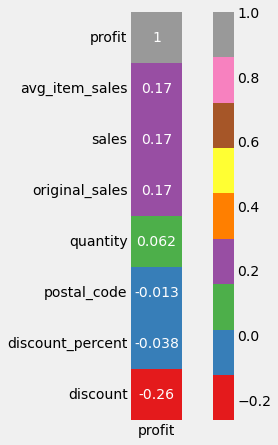

In [334]:
# Perform a Pearson Correlation on the dataset

correlate = df.corr()[['profit']].sort_values('profit', ascending=False)
sns.heatmap(correlate, annot = True, cmap = 'Set1', square = True)
plt.show()

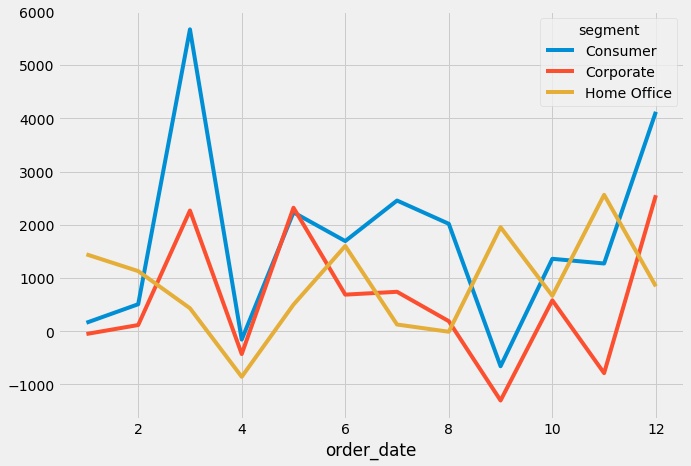

In [349]:
# plot segment over time (monthly)
ax = df.groupby(['segment', df.index.month])['profit'].sum().unstack(0).plot()

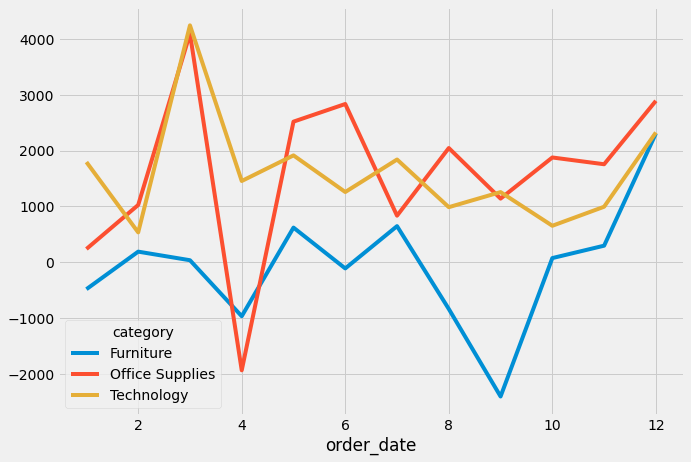

In [350]:
# plot segment over time (monthly)
ax = df.groupby(['category', df.index.month])['profit'].sum().unstack(0).plot()

In [337]:
df_central[['segment','category','profit']].sort_values(by=['segment','category','profit'])

,segment,category,profit
order_date,,,
2017-09-08,Consumer,Furniture,-566.5625
2014-09-20,Consumer,Furniture,-407.6820
2016-06-04,Consumer,Furniture,-356.7280
2015-10-15,Consumer,Furniture,-350.4900
2016-09-08,Consumer,Furniture,-317.1528
...,...,...,...
2016-04-24,Home Office,Technology,64.6740
2015-10-15,Home Office,Technology,67.9920
2017-06-26,Home Office,Technology,135.9800


In [395]:
monthly_seg_profit = (df_central[['profit','segment']]
                  .groupby('segment')
                  .resample('M')
                  .profit.sum()
                  .unstack(0))

/var/folders/x6/9q2vjsz90nx_0lgx5gr8g33w0000gn/T/ipykernel_27929/1870014845.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])


[Text(0, 0.5, 'Profit'),
 Text(0.5, 1.0, 'Yearly Profit By Segment'),
 Text(0.5, 0, 'Year')]

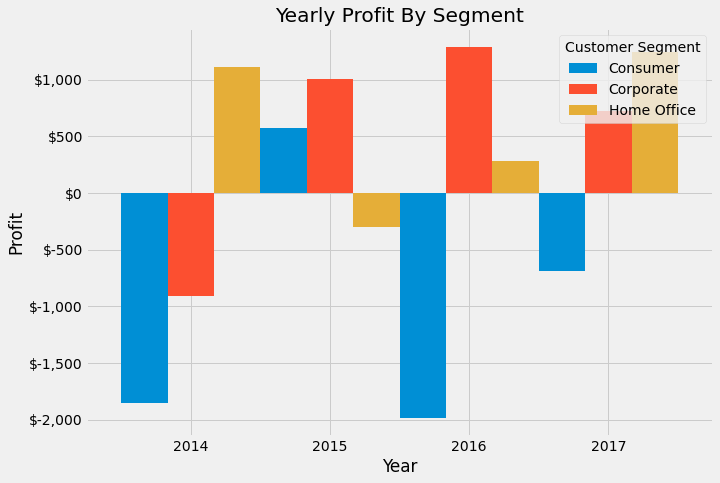

In [400]:
ax = (monthly_seg_profit.resample('Y')
    .sum()
    .plot.bar(width=1))
ax.legend(loc='upper right', title='Customer Segment')
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
ax.set(ylabel='Profit', title='Yearly Profit By Segment', xlabel='Year')

In [398]:
def yearly_cat_profits(df):
    company_cat_profit = (df[['profit','category']]
                  .groupby('category')
                  .resample('M')
                  .profit.sum()
                  .unstack(0))
    ax = (company_cat_profit.resample('Y')
    .sum()
    .plot.bar(width=.8))
    ax.legend(loc='upper right', title='Product Category')
    labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
    ax.set(ylabel='Profit', title='Yearly Profit By Category', xlabel='Year')
    return


In [340]:
company_cat_profit = (df[['profit','category']]
                  .groupby('category')
                  .resample('M')
                  .profit.sum()
                  .unstack(0))

/var/folders/x6/9q2vjsz90nx_0lgx5gr8g33w0000gn/T/ipykernel_27929/2393679773.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])


[Text(0, 0.5, 'Profit'),
 Text(0.5, 1.0, 'Yearly Profit By Category'),
 Text(0.5, 0, 'Year')]

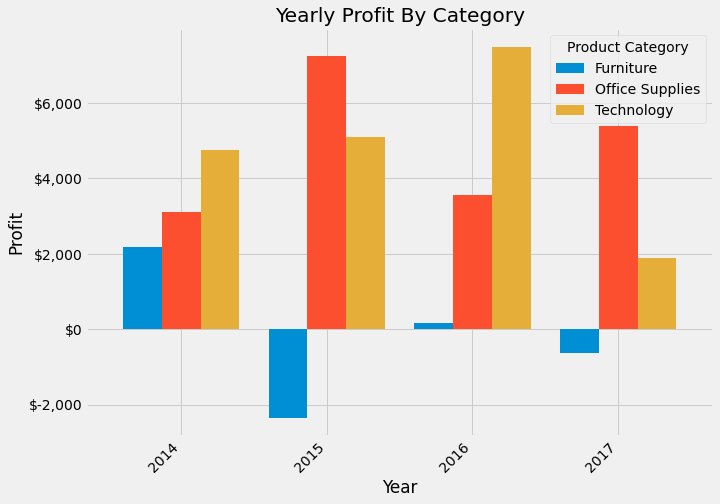

In [397]:
ax = (company_cat_profit.resample('Y')
    .sum()
    .plot.bar(width=.8))
ax.legend(loc='upper right', title='Product Category')
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
ax.set(ylabel='Profit', title='Yearly Profit By Category', xlabel='Year')

In [382]:
# How many orders were made in each region?
reg_orders = pd.DataFrame(df.groupby(['region_name'])['order_id'].count().sort_values(ascending=False))
reg_orders

,order_id
region_name,
East,556
West,541
Central,389
South,248


<AxesSubplot:xlabel='order_date'>

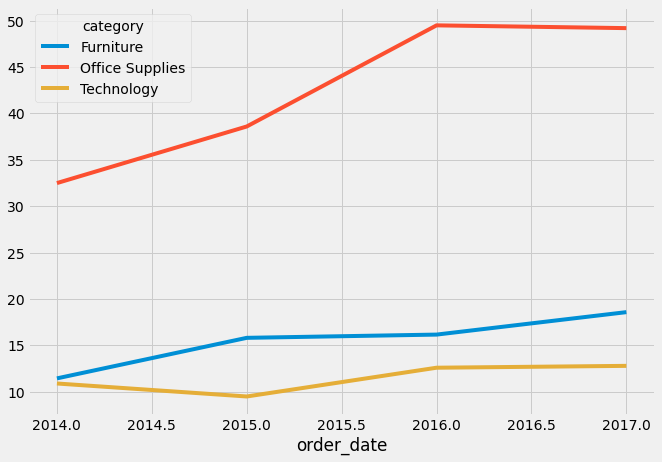

In [348]:
# total discounts per category per year  
df.groupby(['category', df.index.year])['discount'].sum().unstack(0).plot()